In [1]:
import jupytergraffiti

# Extrapolação

A _extrapolação_ é o processo de fazer uma estimativa de uma valor de $f(x)$ que está fora do intervalo dos pontos-base conhecidos, $x_1, x_2, \ldots , x_n$. Como descreve a figura abaixo a natureza de extremidade aberta da extrapolação representa um passo no desconhecido, pois o processo estende a curva além da região conhecida. Dessa forma, a curva verdadeira pode facilmente divergir da previsão. Portanto, deve-se tomar cuidado quando ocorrer um caso no qual seja preciso extrapolar.

![](imagens/extrapolaco.png)

## Perigos da extrapolação

A população em milhões dos Estados Unidos de 1920 a 2000 pode ser tabulada como

Data|População
-------|------
1920|106,46
1930|123,08
1940|132,12
1950|152,27
1960|180,67
1970|205,05
1980|227,23
1990|249,46
2000|281,42

Ajuste um polinômio de sétimo grau aos 8 primeiros pontos (1920 a 1990). Use-o para calcular a população em 2000 por extrapolação e compare sua previsão com o resultado real.


In [2]:
import numpy as np

In [3]:
def coeficientes_newton(x,y):
    m = x.shape[0];
    dd = np.zeros((m,m))
    dd[:,0] = y.copy()
    for j in range(1,m):
        for i in range(m-j):
            dd[i,j] = (dd[i+1,j-1] - dd[i,j-1])/(x[i+j] - x[i])
    return dd[0,:]

def newton_poly(x,xi,coef):
    px = 0;
    for i in range(len(coef)):
        termos = 1;
        for j in range(i):
            termos*=(x-xi[j])
        px += coef[i]*termos
    return px

In [4]:
x = np.array([1920,1930,1940,1950,1960,1970,1980,1990])
y = np.array([106.46,123.08,132.12,152.27,180.65,205.05,227.23,249.46])

coef = coeficientes_newton(x,y)
yi = newton_poly(2000,x,coef)
yi

176.48000000000093

In [5]:
import matplotlib.pyplot as plt


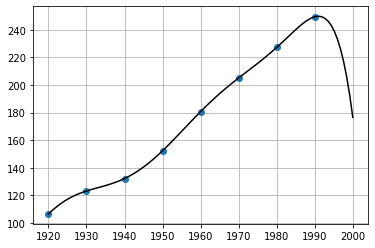

In [6]:
x_i = np.linspace(1920,2000,num=100);
y_i = newton_poly(x_i,x,coef)


plt.plot(x,y,'o',
        x_i,y_i,'k')
plt.grid(True)
plt.show()

# Utilizando regressão
## regressão polinomial linear

In [7]:
def coeficientes_reg_linear(x,y):
    m = x.shape[0]
    sum_xi = np.sum(x)
    sum_xi2 = np.sum(x**2)
    sum_yi = np.sum(y)
    sum_xiyi = np.sum(x*y)
    return np.linalg.solve([[m,sum_xi],[sum_xi,sum_xi2]],[sum_yi,sum_xiyi])

In [10]:
def reta_regressao(x,coef):
    return coef[0] + coef[1]*x

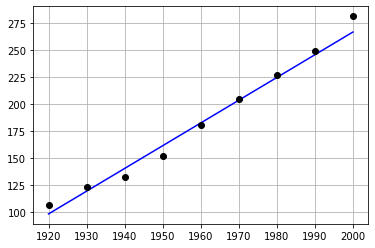

In [16]:
x_c = np.array([1920,1930,1940,1950,1960,1970,1980,1990,2000])
y_c = np.array([106.46,123.08,132.12,152.27,180.65,205.05,227.23,249.46,281.42])

coef_reg = coeficientes_reg_linear(x,y)
x_reg = np.linspace(1920,2000,80)
y_reg = [reta_regressao(xr,coef_reg) for xr in x_reg]
plt.plot(x_reg,y_reg,'b-',
        x_c,y_c,'ko')
plt.grid(True)

## regressão polinomial quadrática

In [17]:
def coeficientes_reg_quadratica(x,y):
    m = x.shape[0]
    sum_xi = np.sum(x)
    sum_xi2 = np.sum(x**2)
    sum_xi3 = np.sum(x**3)
    sum_xi4 = np.sum(x**4)
    sum_yi = np.sum(y)
    sum_yixi = np.sum(x*y)
    sum_yixi2 = np.sum(y*x**2)
    return np.linalg.solve([[m,sum_xi,sum_xi2],[sum_xi,sum_xi2,sum_xi3],[sum_xi2,sum_xi3,sum_xi4]],[sum_yi,sum_yixi,sum_yixi2])

In [18]:
def polinomio_regressao(x,coef):
    return coef[0] + coef[1]*x + coef[2]*x**2

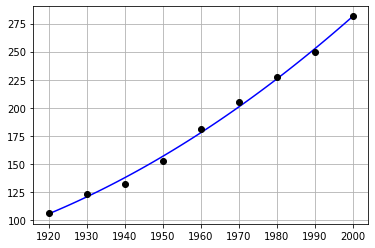

In [19]:
coef_reg = coeficientes_reg_quadratica(x,y)
x_reg = np.linspace(1920,2000,80)
y_reg = [polinomio_regressao(xr,coef_reg) for xr in x_reg]
plt.plot(x_reg,y_reg,'b-',
        x_c,y_c,'ko')
plt.grid(True)

In [20]:
ano_2000 = polinomio_regressao(2000,coef_reg)
ano_2000

281.59285734150035